In [1]:
import sys
sys.path.append('../../..')
import cortexetl as c_etl

In [2]:
ma = c_etl.analysis_initial_processing("2-PfrTransfer-6-3rdConnectionRemaining.yaml", loglevel="ERROR")
a_hex0 = ma.hex0_spikes
a_hexO1 = ma.hex_O1_spikes
c_etl.post_analysis(a_hex0)


----- Custom post analysis -----
Custom post analysis:  16
Custom post analysis:  19
Custom post analysis:  11
Custom post analysis:  45
Custom post analysis:  1
Custom post analysis:  38
Custom post analysis:  46
Custom post analysis:  21
Custom post analysis:  20
Custom post analysis:  3
Custom post analysis:  37
Custom post analysis:  47
Custom post analysis:  13
Custom post analysis:  48
Custom post analysis:  14
Custom post analysis:  50
Custom post analysis:  8
Custom post analysis:  39
Custom post analysis:  49
Custom post analysis:  22
Custom post analysis:  23
Custom post analysis:  5
Custom post analysis:  41
Custom post analysis:  53
Custom post analysis:  6
Custom post analysis:  40
Custom post analysis:  52
Custom post analysis:  15
Custom post analysis:  51
Custom post analysis:  12
Custom post analysis:  2
Custom post analysis:  36
Custom post analysis:  42
Custom post analysis:  55
Custom post analysis:  17
Custom post analysis:  54
Custom post analysis:  25
Custom pos

In [4]:
figure_output_path = "/gpfs/bbp.cscs.ch/project/proj83/home/isbister/data/cortexetl_output/elife_sscx_physiology_2024/collated_manuscript_figures/"
import os
os.makedirs(figure_output_path, exist_ok=True)

# Fig 4G1

In [5]:
sim_1_dir = figure_output_path + 'Fig4/Fig7A-Sim1'
sim_2_dir = figure_output_path + 'Fig4/Fig7A-Sim2'
os.makedirs(sim_1_dir, exist_ok=True)
os.makedirs(sim_2_dir, exist_ok=True)


a_hex0.analysis_config.custom['plot_rasters'] = True
c_etl.plot_rasters(a_hex0, custom_file_path=sim_1_dir, simulation_filter={"ca":1.05, "depol_stdev_mean_ratio": 0.4, "desired_connected_proportion_of_invivo_frs": 0.1})
c_etl.plot_rasters(a_hex0, custom_file_path=sim_2_dir, simulation_filter={"ca":1.1, "depol_stdev_mean_ratio": 0.2, "desired_connected_proportion_of_invivo_frs": 0.9})


----- Plot rasters, window: conn_spont -----
Raster generated:  2.15 s
Raster generated:  0.51 s
Raster generated:  0.90 s
Raster generated:  0.81 s

----- Create raster videos, window: conn_spont -----

----- Plot rasters, window: conn_spont -----
Raster generated:  8.85 s
Raster generated:  0.46 s
Raster generated:  0.84 s
Raster generated:  0.76 s

----- Create raster videos, window: conn_spont -----


# Video

In [6]:
c_etl.plot_rasters(a_hex0)


----- Plot rasters, window: conn_spont -----
Raster generated:  13.16 s
Raster generated:  8.71 s
Raster generated:  3.64 s
Raster generated:  11.97 s
Raster generated:  14.36 s
Raster generated:  13.47 s
Raster generated:  9.76 s
Raster generated:  5.02 s
Raster generated:  6.75 s
Raster generated:  8.66 s
Raster generated:  15.06 s
Raster generated:  14.61 s
Raster generated:  3.73 s
Raster generated:  12.97 s
Raster generated:  16.42 s
Raster generated:  15.83 s
Raster generated:  16.81 s
Raster generated:  5.61 s
Raster generated:  9.73 s
Raster generated:  16.37 s
Raster generated:  15.61 s
Raster generated:  11.49 s
Raster generated:  6.06 s
Raster generated:  3.64 s
Raster generated:  13.96 s
Raster generated:  11.06 s
Raster generated:  6.98 s
Raster generated:  8.41 s
Raster generated:  10.66 s
Raster generated:  5.21 s
Raster generated:  14.43 s
Raster generated:  2.35 s
Raster generated:  8.38 s
Raster generated:  10.81 s
Raster generated:  17.26 s
Raster generated:  5.42 s

# Fig 4G2

Create heatmap: ei_corr_rval


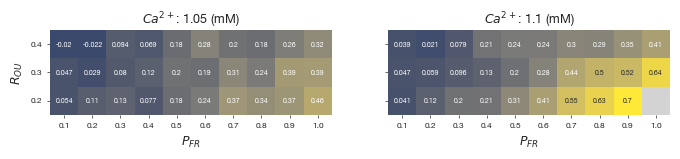

In [9]:
hm_dims = (a_hex0.analysis_config.custom['heatmap_dims']['hor_key'], 
           a_hex0.analysis_config.custom['heatmap_dims']['ver_key'], 
           a_hex0.analysis_config.custom['heatmap_dims']['x_key'], 
           a_hex0.analysis_config.custom['heatmap_dims']['y_key'])

c_etl.heatmap(a_hex0.custom['by_simulation'], 
              "ei_corr_rval", 
              figure_output_path + "Fig7B-ei_corr_rval.pdf", 
              *hm_dims, 
              mask_key="bursting", 
              figsize=(8, 6))

# Fig 4I Left

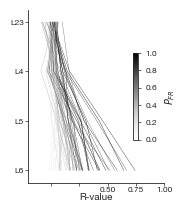

In [12]:
c_etl.plot_sim_stat_lines_all_sims(a_hex0, 
                                   a_hex0.custom['by_layer_and_simulation'], 
                                   "ei_corr_rval", 
                                   {"bursting": False}, 
                                   figure_output_path + "Fig4Ileft-LayerWiseEI_NonBursting", 
                                   [c_etl.silico_layer_strings[:0:-1]], 
                                   ['Greys'], 
                                   show_in_vivo_FRs=False, 
                                   custom_x_lims=[-0.2, 1.0], 
                                   show_colorbar=True,
                                  file_types=[".pdf"],
                                  figsize=(1.6,2.25))

# Fig 4H

In [17]:
# c_etl.flatspace_videos(a_hexO1)

a = a_hexO1


import os
from blueetl.parallel import call_by_simulation
from functools import partial

for flatspace_video_key in a.analysis_config.custom['flatspace_videos']:
    flatspace_video_opt = a.analysis_config.custom['flatspace_videos'][flatspace_video_key]
    flatspace_video_opt['vid_str'] = flatspace_video_opt['window'] + "_" + str(flatspace_video_opt['t_step']) + "_" + str(flatspace_video_opt['n_spatial_bins']) + "_" + str(flatspace_video_opt['temporal_smoothing_sigma'])
    flatspace_video_opt['video_output_root'] = str(a.figpaths.flatspace_videos) + "/" + flatspace_video_opt['vid_str'] + "/"
    os.makedirs(flatspace_video_opt['video_output_root'], exist_ok=True)

    dataframes={
        "circuits": a.repo.simulations.df.loc[:, ['circuit', 'circuit_id', 'simulation_id']],
        "spikes": a.repo.report.df.etl.q(neuron_class="ALL", window=flatspace_video_opt['window']),
        "windows": a.repo.windows.df.etl.q(window=flatspace_video_opt['window']), 
        "neurons": a.repo.neurons.df.etl.q(neuron_class="ALL")}

    gids = a.repo.neurons.df.etl.q(circuit_id=0)['gid']
    locations = a.repo.simulations.df.loc[:, ['circuit', 'circuit_id', 'simulation_id']].iloc[0]['circuit'].nodes[None].get(gids, ["x", "y", "z"])
    
    flat_locations = c_etl.flatten_locations(locations, a.analysis_config.custom["flatmap"])

    results = call_by_simulation(a.repo.simulations.df.etl.q(ca=1.1, depol_stdev_mean_ratio=0.2, desired_connected_proportion_of_invivo_frs=0.9), 
                                    dataframes, 
                                    func=partial(c_etl.single_flatspace_video, 
                                                flat_locations=flat_locations, 
                                                flatspace_video_opt=flatspace_video_opt, 
                                                analysis_config=a.analysis_config.custom,
                                                flatspace_path_pre=figure_output_path + 'Fig7D-correlated_flatspace.mp3', 
                                                images_dir=figure_output_path + 'Fig7D-correlated_flatspace/'),
                                    how='series')

0


50it [00:10,  4.99it/s]


# Fig 4G3

Create heatmap: power


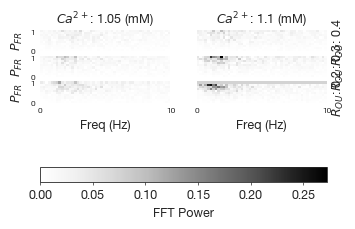

In [19]:
import pandas as pd

hor_key="ca"; ver_key="depol_stdev_mean_ratio"; x_key="freq"; y_key="desired_connected_proportion_of_invivo_frs"
hm_dims = (hor_key, ver_key, x_key, y_key)

all_fft_dfs = pd.merge(a_hex0.custom['fft'].reset_index(), a_hex0.custom['by_simulation'].reset_index()[['simulation_id', 'bursting']])
c_etl.heatmap(all_fft_dfs, "power",  figure_output_path + "Fig7E-FFT", *hm_dims, mask_key="bursting", figsize=(3.7, 2.1), show_colorbar=True, override_cmap='Greys')

In [21]:
a_hex0.custom['by_neuron_class'].columns
min_depol_mean_by_sim = a_hex0.custom['by_neuron_class'].groupby(['simulation_id']).min()['depol_mean']
max_depol_mean_by_sim = a_hex0.custom['by_neuron_class'].groupby(['simulation_id']).max()['depol_mean']
import numpy as np
a = np.mean(max_depol_mean_by_sim - min_depol_mean_by_sim)

min_depol_mean_by_neuron_class = a_hex0.custom['by_neuron_class'].groupby(['neuron_class']).min()['depol_mean']
max_depol_mean_by_neuron_class = a_hex0.custom['by_neuron_class'].groupby(['neuron_class']).max()['depol_mean']
b = np.mean(max_depol_mean_by_neuron_class - min_depol_mean_by_neuron_class)

a/b


/nvme/isbister/2659970/ipykernel_270433/1880729466.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_depol_mean_by_sim = a_hex0.custom['by_neuron_class'].groupby(['simulation_id']).min()['depol_mean']
/nvme/isbister/2659970/ipykernel_270433/1880729466.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_depol_mean_by_sim = a_hex0.custom['by_neuron_class'].groupby(['simulation_id']).max()['depol_mean']
/nvme/isbister/2659970/ipykernel_270433/1880729466.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the 

5.217868306947665